In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [95]:
# Import libraries

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy import stats

import my_functions as func

In [4]:
"""
Main program

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_char_dict()

## Cylindricity of convex cylinders

<AxesSubplot:xlabel='angle', ylabel='error'>

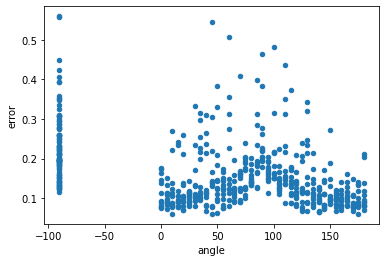

In [5]:
# List of characteristics to plot
chars = ['Cylindricity_Cyl_4mm_Pos',\
         'Cylindricity_Cyl_8mm_Pos',\
         'Cylindricity_Cyl_16mm_Pos',\
         'Cylindricity_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
dfs = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

dfs.plot.scatter(x='angle', y='error')

<AxesSubplot:xlabel='angle', ylabel='error'>

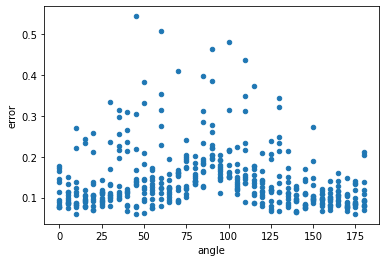

In [6]:
# Remove anchors from dataset
df1 = dfs[dfs['angle'] != -90]

df1.plot.scatter(x='angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

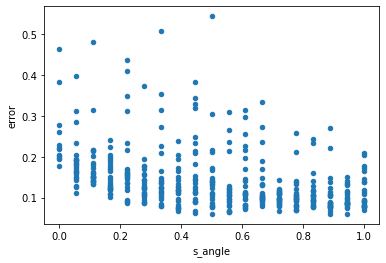

In [7]:
# Construct s_angle where 0 represents horizontal and 1 vertical orientation

df1.insert(7, 's_angle', abs(df1['angle']-90) / 90)

df1.plot.scatter(x='s_angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

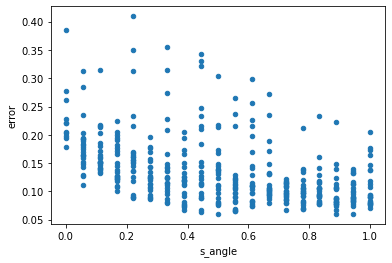

In [8]:
"""
Filter results by quantiles

"""

df_ang = df1

for ang in df_ang['s_angle'].unique():
    q_hi = df_ang[(df_ang['s_angle'] == ang)]['error'].quantile(0.99)
    
    if ang == df_ang['s_angle'].unique()[0]:
        df_filtered = df_ang[(df_ang['s_angle'] == ang) & (df_ang['error'] < q_hi)]
    else:
        df_filtered = pd.concat([df_filtered, df_ang[(df_ang['s_angle'] == ang) & (df_ang['error'] < q_hi)]])
    
df_filtered.plot.scatter(x='s_angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

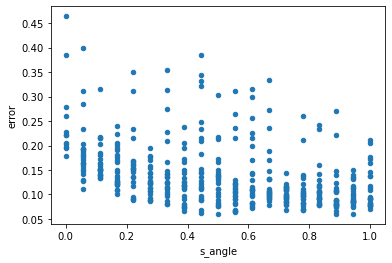

In [9]:
"""
Filtering results by standard deviations

"""

# Copy dataframe
df_new = df1

std = df_new['error'].std()


for ang in df_new['s_angle'].unique():
    hi_lim = df_new[(df_new['s_angle'] == ang)]['error'].mean() + (3*std)    
    
    if ang == df_new['s_angle'].unique()[0]:
        df_filtered = df_new[(df_new['s_angle'] == ang) & (df_new['error'] < hi_lim)]
    else:
        df_filtered = pd.concat([df_filtered, df_new[(df_new['s_angle'] == ang) & (df_new['error'] < hi_lim)]])
    
df_filtered.plot.scatter(x='s_angle', y='error')

## Cylindricity of concave cylinders

<AxesSubplot:xlabel='angle', ylabel='error'>

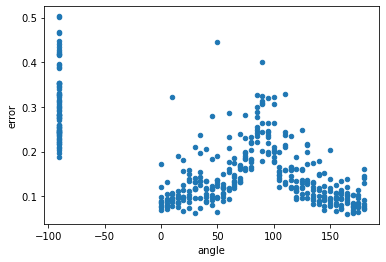

In [10]:
# List of characteristics to plot
chars = ['Cylindricity_Cyl_8mm_Neg',\
         'Cylindricity_Cyl_16mm-Neg',\
         'Cylindricity_Cyl_24mm_Neg']

# Retrieve the characteristics from the dictionary
dfs = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

dfs.plot.scatter(x='angle', y='error')

<AxesSubplot:xlabel='angle', ylabel='error'>

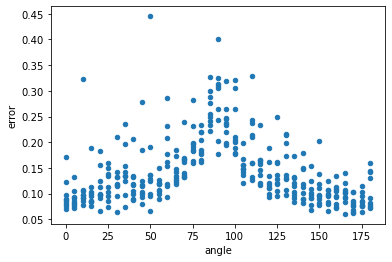

In [11]:
# Remove anchors from dataset
df1 = dfs[dfs['angle'] != -90]

df1.plot.scatter(x='angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

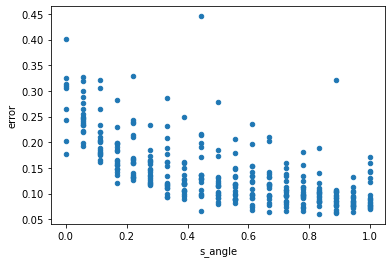

In [12]:
# Construct s_angle where 0 represents horizontal and 1 vertical orientation
df1.insert(7, 's_angle', abs(df1['angle']-90) / 90)

df1.plot.scatter(x='s_angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

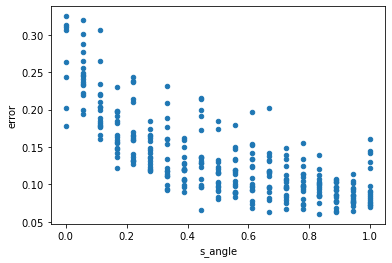

In [13]:
"""
Filter results by quantiles

"""

df_ang = df1

for ang in df_ang['s_angle'].unique():
    q_hi = df_ang[(df_ang['s_angle'] == ang)]['error'].quantile(0.99)
    
    if ang == df_ang['s_angle'].unique()[0]:
        df_filtered = df_ang[(df_ang['s_angle'] == ang) & (df_ang['error'] < q_hi)]
    else:
        df_filtered = pd.concat([df_filtered, df_ang[(df_ang['s_angle'] == ang) & (df_ang['error'] < q_hi)]])
    
df_filtered.plot.scatter(x='s_angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

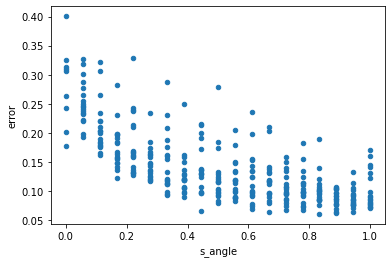

In [14]:
"""
Filtering results by standard deviations

"""

# Copy dataframe
df_new = df1

std = df_new['error'].std()


for ang in df_new['s_angle'].unique():
    hi_lim = df_new[(df_new['s_angle'] == ang)]['error'].mean() + (3*std)
    lo_lim = df_new[(df_new['s_angle'] == ang)]['error'].mean() - (3*std)
    
    if ang == df_new['s_angle'].unique()[0]:
        df_filtered = df_new[(df_new['s_angle'] == ang) & (df_new['error'] < hi_lim) & (df_new['error'] > lo_lim)]
    else:
        df_filtered = pd.concat([df_filtered, df_new[(df_new['s_angle'] == ang) & (df_new['error'] < hi_lim) & (df_new['error'] > lo_lim)]])
    
df_filtered.plot.scatter(x='s_angle', y='error')

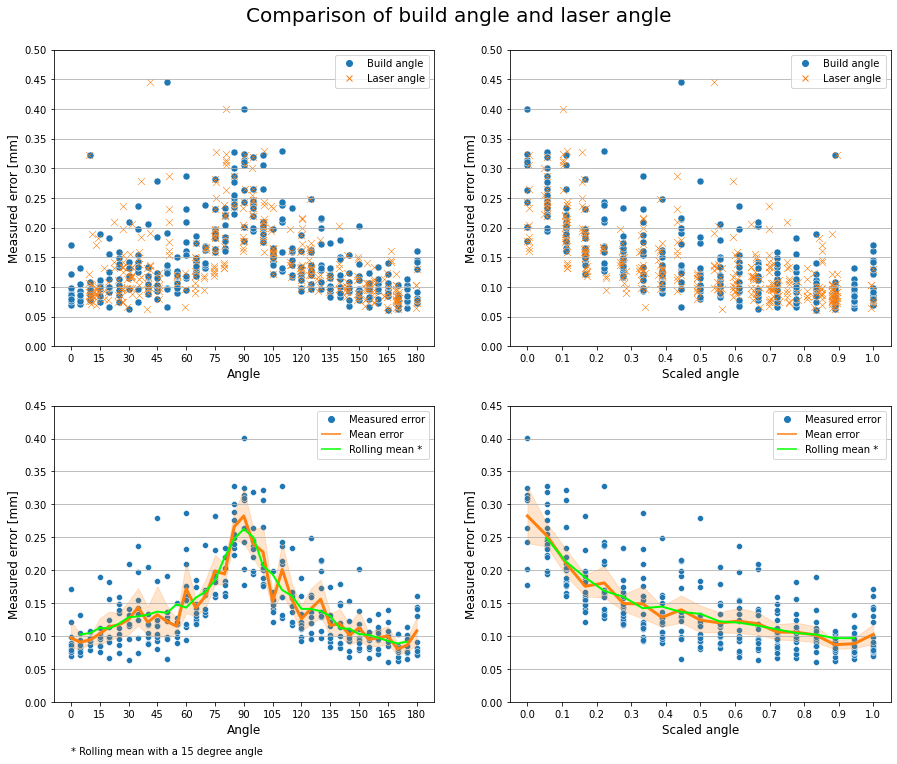

In [128]:
"""
Investigate the effect of laser angle and the symetry about 90 degrees orientation

Missing:
 - Plot legend
 - Axis labels
 - Axis titles
 - Plot titles
 - Edit figure title

"""


## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_8mm_Neg',\
         'Cylindricity_Cyl_16mm-Neg',\
         'Cylindricity_Cyl_24mm_Neg']

# Retrieve the characteristics from the dictionary
dfs = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Remove anchors from dataset
dfs = dfs[dfs['angle'] != -90]

# Add column for laser angle
dfs = func.add_laser_angle(dfs)

# Add scaled angles for build angle
dfs.insert(7, 's_b_angle', abs(dfs['angle']-90) / 90)

# Add scaled angles for laser angle
dfs.insert(7, 's_l_angle', abs(dfs['laser_angle']-90) / 90)


## Create figure
# Initialize figure as a grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Set figure title
fig.suptitle('Comparison of build angle and laser angle', y=0.93, fontsize=20)

# Define colors
colors = ['tab:blue', 'tab:orange', 'lime']

# Define markers
symbols = ['o', 'x']

# Define marker size
size = 50

# Define transperancy
transp = 1

# Initialize list for legend creation
legend_elements = []


## Plot the unfiltered data
sns.scatterplot(ax=axs[0, 0], data=dfs, x='angle', y='error', marker=symbols[0], s=size, color=colors[0])
sns.scatterplot(ax=axs[0, 0], data=dfs, x='laser_angle', y='error', marker=symbols[1], color=colors[1], s=size, alpha=transp, legend='full')
sns.scatterplot(ax=axs[0, 1], data=dfs, x='s_b_angle', y='error', marker=symbols[0], s=size, color=colors[0])
sns.scatterplot(ax=axs[0, 1], data=dfs, x='s_l_angle', y='error', marker=symbols[1], s=size, color=colors[1], alpha=transp, legend='full')

# Define legend elements
legend_elements.append([Line2D([], [], color=colors[0], marker=symbols[0], dashes=(0, 1), label="Build angle"),\
                        Line2D([], [], color=colors[1], marker=symbols[1], dashes=(0, 1), label="Laser angle")])


## Filter results by standard deviation
# Calculate the standard deviation for the entire population
std = dfs['error'].std()

# Go thorugh all the unique angles
for ang in dfs['s_b_angle'].unique():
    # Calculate upper and lower limits as +/- 3 standard deviations
    hi_lim = dfs[(dfs['s_b_angle'] == ang)]['error'].mean() + (3*std)
    lo_lim = dfs[(dfs['s_b_angle'] == ang)]['error'].mean() - (3*std)
    
    # Filter out values
    if ang == dfs['s_b_angle'].unique()[0]:
        df_filtered = dfs[(dfs['s_b_angle'] == ang) & (dfs['error'] < hi_lim) & (dfs['error'] > lo_lim)]
    else:
        df_filtered = pd.concat([df_filtered, dfs[(dfs['s_b_angle'] == ang) & (dfs['error'] < hi_lim) & (dfs['error'] > lo_lim)]])
        
        
## Plot the filtered data
sns.scatterplot(ax=axs[1, 0], data=df_filtered, x='angle', y='error', color=colors[0])
sns.scatterplot(ax=axs[1, 1], data=df_filtered, x='s_b_angle', y='error', color=colors[0])
sns.lineplot(ax=axs[1, 0], data=df_filtered, x='angle', y='error', color=colors[1], linewidth=3)
sns.lineplot(ax=axs[1, 1], data=df_filtered, x='s_b_angle', y='error', color=colors[1], linewidth=3)


## Calculate mean values
# Create dataframe with mean error values for each angle
m_df = dfs[['error', 'angle']].groupby('angle').mean().reset_index()

# Compute the rolling mean for each angle +/- 1
m_df['rolling'] = m_df['error'].rolling(3).mean().shift(-1)

# Create dataframe with mean error values for each scaled angle
m_s_df = dfs[['error', 's_b_angle']].groupby('s_b_angle').mean().reset_index()

# Compute the rolling mean for each scaled angle +/- 1
m_s_df['rolling'] = m_s_df['error'].rolling(3).mean().shift(-1)

# Plot rolling mean values to second row of the figure
sns.lineplot(ax=axs[1, 0], data=m_df, x='angle', y='rolling', color=colors[2], linewidth=2)
sns.lineplot(ax=axs[1, 1], data=m_s_df, x='s_b_angle', y='rolling', color=colors[2], linewidth=2)

# Define legend elements
legend_elements.append([Line2D([], [], color=colors[0], marker='o', dashes=(0, 1), label="Measured error"),\
                        Line2D([], [], color=colors[1], dashes=(1, 0), label="Mean error"),\
                        Line2D([], [], color=colors[2], dashes=(1, 0), label="Rolling mean *")])


for i in range(2):
    for j in range(2):
        axs[i, j].legend(handles=legend_elements[i])
        axs[i, j].set_ylim(0, 0.5-(i*0.05))
        axs[i, j].set_yticks(np.linspace(0, 0.5-(i*0.05), (11-i)))
        axs[i, j].set_xticks(np.arange(0, 181, 15) if j == 0 else np.linspace(0, 1, 11))
        axs[i, j].grid(axis='y')
        axs[i, j].set_xlabel("Angle" if j == 0 else "Scaled angle", fontsize=12)
        axs[i, j].set_ylabel("Measured error [mm]", fontsize=12)


axs[1, 0].text(0, -0.08, "* Rolling mean with a 15 degree angle")
        
## Display plot
plt.show()

In [79]:
test = dfs

test.head()

,error,build,part_index,x_pos,y_pos,z_pos,angle,s_l_angle,s_b_angle,center_x,center_y,center_z,laser_angle
part_name,,,,,,,,,,,,,
Leirmo_Exp1_Build1_#1,0.132299,1,1,1,1,1,70,0.115517,0.222222,70,70,50.88,79.603463
Leirmo_Exp1_Build1_#10,0.097782,1,10,1,1,2,20,0.658010,0.777778,70,70,150.60,30.779098
Leirmo_Exp1_Build1_#11,0.086617,1,11,2,1,2,15,0.728196,0.833333,170,70,150.60,24.462322
Leirmo_Exp1_Build1_#12,0.105957,1,12,3,1,2,55,0.279729,0.388889,270,70,150.60,64.824376
Leirmo_Exp1_Build1_#13,0.091756,1,13,1,2,2,135,0.491396,0.500000,70,170,150.60,134.225638


In [80]:
test = test[['error', 'angle', 'laser_angle']]

test.head()

,error,angle,laser_angle
part_name,,,
Leirmo_Exp1_Build1_#1,0.132299,70,79.603463
Leirmo_Exp1_Build1_#10,0.097782,20,30.779098
Leirmo_Exp1_Build1_#11,0.086617,15,24.462322
Leirmo_Exp1_Build1_#12,0.105957,55,64.824376
Leirmo_Exp1_Build1_#13,0.091756,135,134.225638


In [81]:
test_1 = test.drop(columns=['laser_angle'])

test_1['adjusted'] = False

test_1.head()

,error,angle,adjusted
part_name,,,
Leirmo_Exp1_Build1_#1,0.132299,70,False
Leirmo_Exp1_Build1_#10,0.097782,20,False
Leirmo_Exp1_Build1_#11,0.086617,15,False
Leirmo_Exp1_Build1_#12,0.105957,55,False
Leirmo_Exp1_Build1_#13,0.091756,135,False


In [84]:
test_2 = test.drop(columns='angle')

test_2['adjusted'] = True

test_2.rename(columns={'laser_angle':'angle'}, inplace=True)

test_2.head()

,error,angle,adjusted
part_name,,,
Leirmo_Exp1_Build1_#1,0.132299,79.603463,True
Leirmo_Exp1_Build1_#10,0.097782,30.779098,True
Leirmo_Exp1_Build1_#11,0.086617,24.462322,True
Leirmo_Exp1_Build1_#12,0.105957,64.824376,True
Leirmo_Exp1_Build1_#13,0.091756,134.225638,True


In [86]:
test_3 = pd.concat([test_1, test_2])

print(test_3.head())

test_3.describe()

                           error  angle  adjusted
part_name                                        
Leirmo_Exp1_Build1_#1   0.132299   70.0     False
Leirmo_Exp1_Build1_#10  0.097782   20.0     False
Leirmo_Exp1_Build1_#11  0.086617   15.0     False
Leirmo_Exp1_Build1_#12  0.105957   55.0     False
Leirmo_Exp1_Build1_#13  0.091756  135.0     False


,error,angle
count,666.000000,666.000000
mean,0.142605,90.434803
std,0.064078,52.685276
min,0.060568,0.000000
25%,0.096306,41.417215
50%,0.123789,90.000000
75%,0.172459,135.000000
max,0.445237,180.000000


<AxesSubplot:xlabel='angle', ylabel='error'>

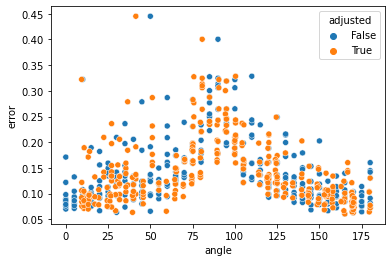

In [88]:
sns.scatterplot(data=test_3, x='angle', y='error', hue='adjusted')

In [91]:
melt = pd.melt(test)

melt['adjusted'] = True if ['variable'] == 'laser_angle'

new_test = melt.pivot(columns=['error', 'angle', 'adjusted'])

new_test

SyntaxError: invalid syntax (<ipython-input-91-1ecca2eff942>, line 3)